<a href="https://colab.research.google.com/github/Namyalg/Projects_in_python/blob/master/Canny_Edge_Detection_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from math import sqrt, atan
from math import atan, degrees

In [2]:
kernel_blur = np.array([0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11]).reshape(3,3)
kernel_conv_Y = np.array([-1,-2,-1,0,0,0,1,2,1]).reshape(3,3)
kernel_conv_X = kernel_conv_Y.transpose()

In [ ]:
#This is the implementation of the canny filer:
# - Convert to grayscale
# - Gaussian filter for blurring and to reduce the sharpness
# - Apply sobel filter in X and Y direction to detect the edges
# - Get the gradient, then non-maximal supression and then hystersis double thresholding to get the 
# th value of the lines are thinned


In [3]:
def apply_convolution(img, kernel, height, weight):
  pixels = []
  #pixels are extracted from the image converted to grayscale
  for i in range(height):
    for j in range(width):
      pixels.append(img[i,j])

  #The pixels array is resized in accordance with the size of the image
  pixels = np.array(pixels).reshape(height,width)

  #To handle the edge cases, sentinel values are used
  #The pixels array is bound by zeros on all edges

            # 00000000
            # 0PIXELS0
            # 00000000
  #This is done to ensure that the kernel is applied to all the pixels
  #Sentinel values to ensure the edges arent missed out

  #Along the rows and columns
  pixels = np.insert(pixels , [0,height] , np.zeros(len(pixels[0])) , axis = 0)
  pixels = np.insert(pixels , [0, width] , np.zeros((len(pixels[:, 0]) ,1)) , axis = 1)

  #Convolution is applied here
  convolute = []
  for i in range(1,height):
    for j in range(1,width):
      temp = pixels[i:i+3 , j:j+3]
      product = np.multiply(temp,kernel)
      convolute.append(sum(sum(product)))

  convolute = np.array(convolute).reshape(height-1,width-1)
  return(convolute)

In [13]:
def sobel_filter(convoluted_X, convoluted_Y):
  sobel = []
  arc = []
  for i in range(height-2):
    for j in range(width-2):
      in_x = pow(convoluted_X[i,j] ,2)
      in_y = pow(convoluted_Y[i,j] , 2)
      gradient_X = convoluted_X[i,j]
      gradient_Y = convoluted_Y[i,j]
      gradient_Z = sqrt(in_x + in_y)
      sobel.append(gradient_Z)
  sobel = np.array(sobel).reshape(height-2, width-2)
  return(sobel)

In [5]:
def change_dimensions(convoluted_X, convoluted_Y, sobel):
  height_con = convoluted_X.shape[0]
  width_con = convoluted_X.shape[1]
  convoluted_X = np.insert(convoluted_X , [0,height_con-1] , np.zeros(len(convoluted_X[0])) , axis = 0)
  convoluted_X = np.insert(convoluted_X , [0, width_con-1] , np.zeros((len(convoluted_X[:, 0]) ,1)) , axis = 1)    
  convoluted_Y = np.insert(convoluted_Y , [0,height_con-1] , np.zeros(len(convoluted_Y[0])) , axis = 0)
  convoluted_Y = np.insert(convoluted_Y , [0, width_con-1] , np.zeros((len(convoluted_Y[:, 0]) ,1)) , axis = 1)
  sobel = np.insert(sobel , [0,sobel.shape[0]-1] , np.zeros(len(sobel[0])) , axis = 0)
  sobel = np.insert(sobel , [0, sobel.shape[1]-1] , np.zeros((len(sobel[:, 0]) ,1)) , axis = 1)
  return(convoluted_X , convoluted_Y, sobel)

In [11]:
def non_linearity(convoluted_X, convoluted_Y, sobel):
  value = 0
  non_li = []
  height_con = convoluted_X.shape[0] - 1
  width_con = convoluted_X.shape[1] - 1
  for i in range(1 , height_con-1):
    for j in range(1, width_con-1):
      grx = convoluted_X[i, j]
      gry = convoluted_Y[i, j]
      sob = sobel[i, j]
      if gry == 0:
        if sob >= sobel[i, j+1] and sob >= sobel[i, j-1]:
          value = sob
        else:
          value = 0
      elif grx == 0:
        if sob >= sobel[i+1, j] and sob >= sobel[i-1, j]:
          value = sob
        else:
          value = 0
      else:
        angle = degrees(atan(gry/grx))
        if grx > 0 and gry > 0:
          gr = angle
        elif grx < 0 and gry < 0:
          gr = 180 + angle
        elif grx > 0 and gry < 0:
          gr = 360 + angle
        else:
          gr = 180 + angle
        p1 = [*range(0,22)]
        p2 = [*range(22,67)]
        p3 = [*range(67,112)]
        p4 = [*range(112,157)]
        p5 = [*range(157,202)]
        p6 = [*range(202,247)] 
        p7 = [*range(247,290)]
        p8 = [*range(290,337)]          
        p9 = [*range(337,360)]
        gr = int(gr)
        if gr in p1 or gr in p5 or gr in p9:
          if sob >= sobel[i, j+1] and sob >= sobel[i, j-1]:
            value = sob
          else:
              value = 0
        elif gr in p2 or gr in p6:
          if sob >= sobel[i-1, j+1] and sob >= sobel[i+1, j-1]:
            value = sob
          else:
              value = 0
        elif gr in p3 or gr in p7:
          if sob >= sobel[i-1, j] and sob >= sobel[i+1, j]:
            value = sob
          else:
              value = 0
        elif gr in p4 or gr in p8:
          if sob >= sobel[i-1, j-1] and sob >= sobel[i+1, j + 1]:
            value = sob
          else:
              value = 0
      non_li.append(value)

  non_li = np.array(non_li).reshape(height_con-2, width_con-2)
  return(non_li)
    

In [9]:
def double_threshold(non_li):
  height, width = non_li.shape
  high = np.amax(non_li)*0.8
  low = np.amax(non_li)*0.18
  final = []
  for i in range(height):
    for j in range(width):
      if non_li[i,j] > high:
        final.append(255)
      elif low <= non_li[i,j] <= high:
        final.append(non_li[i,j])
      else:
        final.append(0)
  final = np.array(final).reshape(height, width)
  return(final)

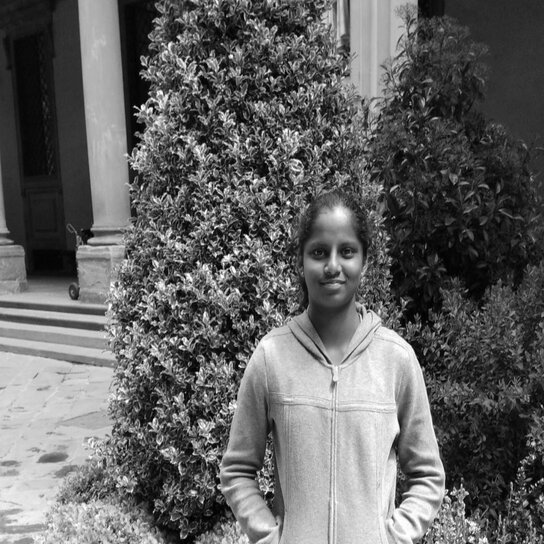



Blurred Image




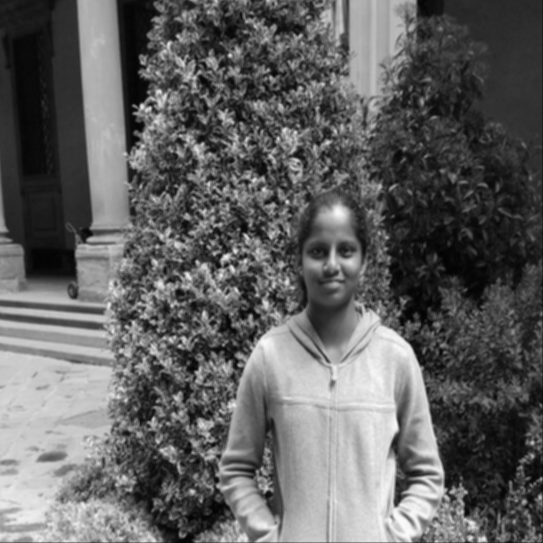



Convolute_Y Image




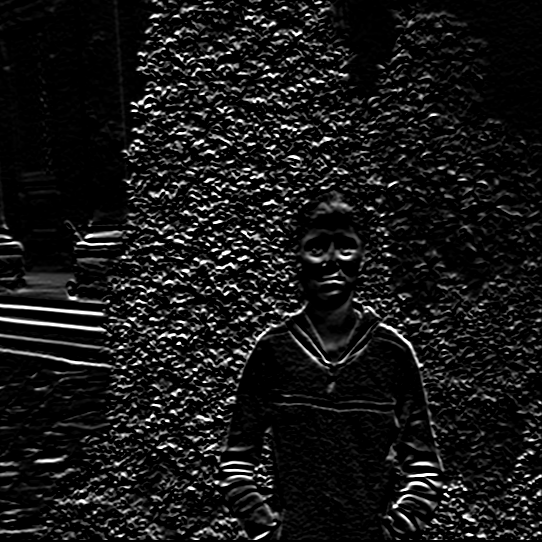



Convolute_X Image




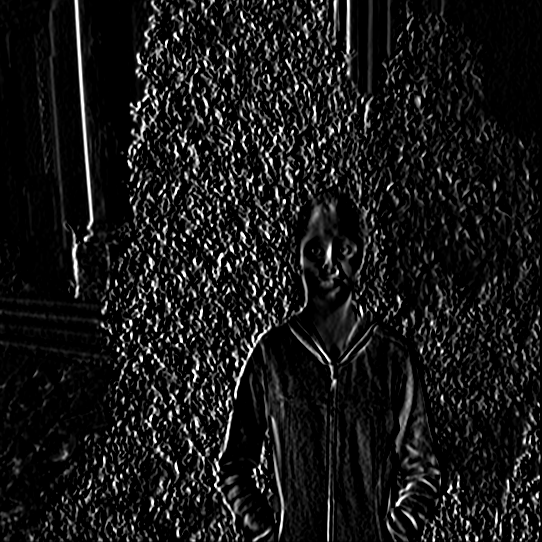



After Sobel




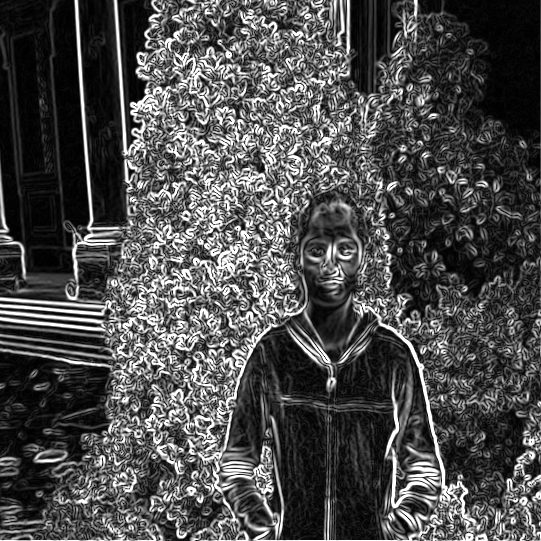



After non-linearity




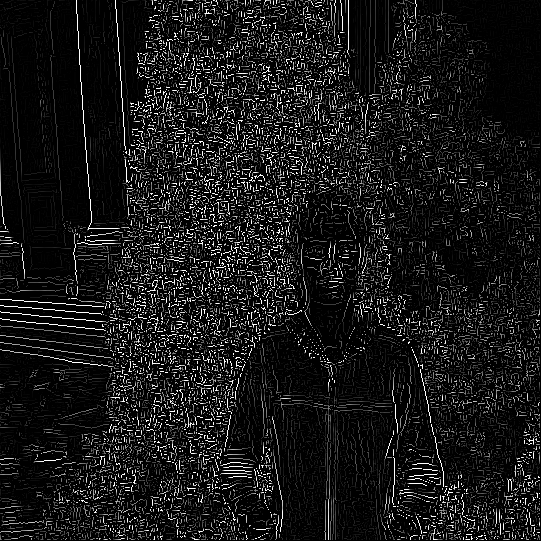



After Canny




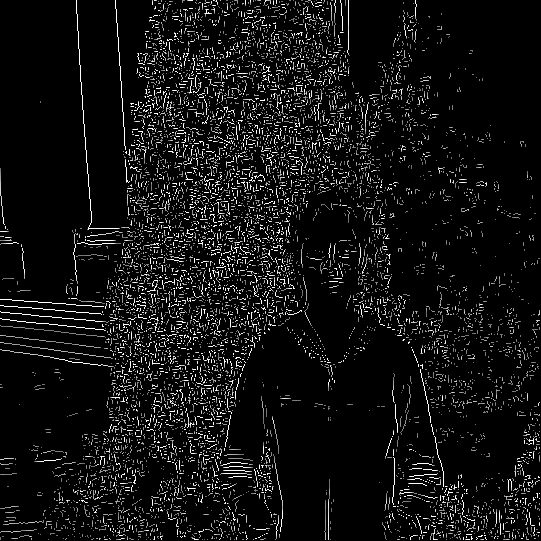

In [14]:
#Image is converted to grayscale
img = cv2.imread('/content/Namyalg.jpg',0)
#img = cv2.resize(img, (300, 360))
cv2_imshow(img)
height = img.shape[0]
width = img.shape[1]
blurred_img = apply_convolution(img, kernel_blur, height, width)
print("\n\nBlurred Image\n\n")
cv2_imshow(blurred_img)

height = height-1
width = width -1
conv_Y = apply_convolution(blurred_img, kernel_conv_Y, height, width)
print("\n\nConvolute_Y Image\n\n")
cv2_imshow(conv_Y)

conv_X = apply_convolution(blurred_img, kernel_conv_X, height, width )
print("\n\nConvolute_X Image\n\n")
cv2_imshow(conv_X)

sobel = sobel_filter(conv_X, conv_Y)
print("\n\nAfter Sobel\n\n")
cv2_imshow(sobel)

conv_X, conv_Y, sobel = change_dimensions(conv_X, conv_Y, sobel)

non_linear_filter = non_linearity(conv_X, conv_Y, sobel)
print("\n\nAfter non-linearity\n\n")
cv2_imshow(non_linear_filter)

canny_filtered_image = double_threshold(non_linear_filter)
print("\n\nAfter Canny\n\n")
cv2_imshow(canny_filtered_image)